# IS362 Final Project - Covid-19
![COVID banner](https://www.ci.wheatridge.co.us/ImageRepository/Document?documentId=31874)
## New York Vs. The United States.
### by Dennis Awad


With COVID-19 being an all-consuming topic currently I think it very relevant to gather and examine the data on the topic for my final project. I hope to show the difference between what New York State, and City are going through, versus the rest of the United States. Additionally, I hope to examine the data and report on who is most effected by the virus, what locations are more severely effected. This is much of the same data examination being done currently to help state and local governments decide how and where to combat the virus.

***
First we must import the libraries we need to parse or data.

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

***
Here we will retrieve the `Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19_.csv` from our IS362 Final Project Folder and enter it into a dataframe`covid19_deaths`. This data most current version is as of 4/30/20.

In [20]:
covid19_deaths = pd.read_csv('Provisional_Death_Counts_for_Coronavirus_Disease__COVID-19_.csv', header=0)
covid19_deaths

Data as of              Group           State  \
0   04/30/2020            By week   United States   
1   04/30/2020            By week   United States   
2   04/30/2020            By week   United States   
3   04/30/2020            By week   United States   
4   04/30/2020            By week   United States   
5   04/30/2020            By week   United States   
6   04/30/2020            By week   United States   
7   04/30/2020            By week   United States   
8   04/30/2020            By week   United States   
9   04/30/2020            By week   United States   
10  04/30/2020            By week   United States   
11  04/30/2020            By week   United States   
12  04/30/2020            By week   United States   
13  04/30/2020            By week   United States   
14  04/30/2020             By age   United States   
15  04/30/2020             By age   United States   
16  04/30/2020             By age   United States   
17  04/30/2020             By age   United States   
18  04/30/2020             By age   United States   
19  04/30/2020             By age   United States   
20  04/30/2020             By age   United States   
21  04/30/2020             By age   United States   
22  04/30/2020             By age   United States   
23  04/30/2020             By age   United States   
24  04/30/2020             By age   United States   
25  04/30/2020             By age   United States   
26  04/30/2020           By state   United States   
27  04/30/2020           By state         Alabama   
28  04/30/2020           By state          Alaska   
29  04/30/2020           By state         Arizona   
..         ...                ...             ...   
63  04/30/2020           By state            Ohio   
64  04/30/2020           By state        Oklahoma   
65  04/30/2020           By state          Oregon   
66  04/30/2020           By state    Pennsylvania   
67  04/30/2020           By state    Rhode Island   
68  04/30/2020           By state  South Carolina   
69  04/30/2020           By state    South Dakota   
70  04/30/2020           By state       Tennessee   
71  04/30/2020           By state           Texas   
72  04/30/2020           By state            Utah   
73  04/30/2020           By state         Vermont   
74  04/30/2020           By state        Virginia   
75  04/30/2020           By state      Washington   
76  04/30/2020           By state   West Virginia   
77  04/30/2020           By state       Wisconsin   
78  04/30/2020           By state         Wyoming   
79  04/30/2020           By state     Puerto Rico   
80  04/30/2020             By sex   United States   
81  04/30/2020             By sex   United States   
82  04/30/2020             By sex   United States   
83  04/30/2020             By sex   United States   
84  04/30/2020  By place of death   United States   
85  04/30/2020  By place of death   United States   
86  04/30/2020  By place of death   United States   
87  04/30/2020  By place of death   United States   
88  04/30/2020  By place of death   United States   
89  04/30/2020  By place of death   United States   
90  04/30/2020  By place of death   United States   
91  04/30/2020  By place of death   United States   
92  04/30/2020  By place of death   United States   

                                           Indicator  Start week    End week  \
0                                       Total Deaths  02/01/2020  04/25/2020   
1                                        Week-ending  02/01/2020  02/01/2020   
2                                        Week-ending  02/08/2020  02/08/2020   
3                                        Week-ending  02/15/2020  02/15/2020   
4                                        Week-ending  02/22/2020  02/22/2020   
5                                        Week-ending  02/29/2020  02/29/2020   
6                                        Week-ending  03/07/2020  03/07/2020   
7                                        Week-ending  03/14/2020  03/14/2020 

***
Now that we have our data frame let’s take a look at the `Group` column, as that is how this data seems to be sorted. We will take a look at the values that exist with in this column.

In [21]:
covid19_deaths.Group.value_counts(dropna=False)

By state             54
By week              14
By age               12
By place of death     9
By sex                4
Name: Group, dtype: int64

We see that all the rows are divided amongst 5 distinct groups. So, we will divide this dataframe into these groups, into different variables `bystate`, `byweek`, `byage`, `byplaceofdeath`, `bysex`.

***
Below we will create the `bystate` variable that will take all the rows that consist of the Group 'By state'. We then clean this data by taking only the column we need consisting of COVID-19 deaths that is `All COVID-19 Deaths (U07.1)` and the states those deaths are in being the `State columns` and we will put this clean data into a new variable `total_covid_deaths_bystate`. When reviewing the `covid19_deaths` variable I saw some `NaN` values so we need to search for those as well.

In [22]:
bystate = covid19_deaths[covid19_deaths['Group']=='By state']
total_covid_deaths_bystate = bystate[['State', 'All COVID-19 Deaths (U07.1)']]
total_covid_deaths_bystate[total_covid_deaths_bystate['All COVID-19 Deaths (U07.1)'].isnull()]

State  All COVID-19 Deaths (U07.1)
28        Alaska                          NaN
38        Hawaii                          NaN
53       Montana                          NaN
62  North Dakota                          NaN
69  South Dakota                          NaN
78       Wyoming                          NaN

As we can see above, these are the values that have a `NaN` value for covid deaths. In order to have cleaner data we will convert these `NaN`s to `O`. We will do this in another new variable `total_covid_deaths_bystate_fillNA` as to not confuse our original data.

In [23]:
total_covid_deaths_bystate_fillNA=total_covid_deaths_bystate[['State','All COVID-19 Deaths (U07.1)']].fillna(value=0)

Let’s re-check our work to make sure we no longer have `NaN` values in the `total_covid_deaths_bystate_fillNA` variable.

In [24]:
total_covid_deaths_bystate_fillNA[total_covid_deaths_bystate_fillNA['All COVID-19 Deaths (U07.1)'].isnull()]

Empty DataFrame
Columns: [State, All COVID-19 Deaths (U07.1)]
Index: []

Great. As we can see  we were returned and empty result, meaning we no longer have any `NaN` values in our `total_covid_deaths_bystate_fillNA`.

***
## By State:

![US Heat map 4/13/20](https://api.hub.jhu.edu/factory/sites/default/files/styles/hub_xlarge/public/map_top041420.jpg?itok=B3bPv10e)

Below we will change the structure of `total_covid_deaths_bystate_fillNA`. We will set the index to be the `State` names. 

Then we create yet another variable of this data called `dropUS` that will consist of removing the entry in the data that is the `United States`, as this is the combined total of all the states COVID-19 deaths in the dataframe.

After this we will then create a chart to visualize `dropUS` that will diplay COVID-19 Deaths by each state as of 4/30/20.

Text(0.5,1,'All U.S. Covid-19 Deaths By State')

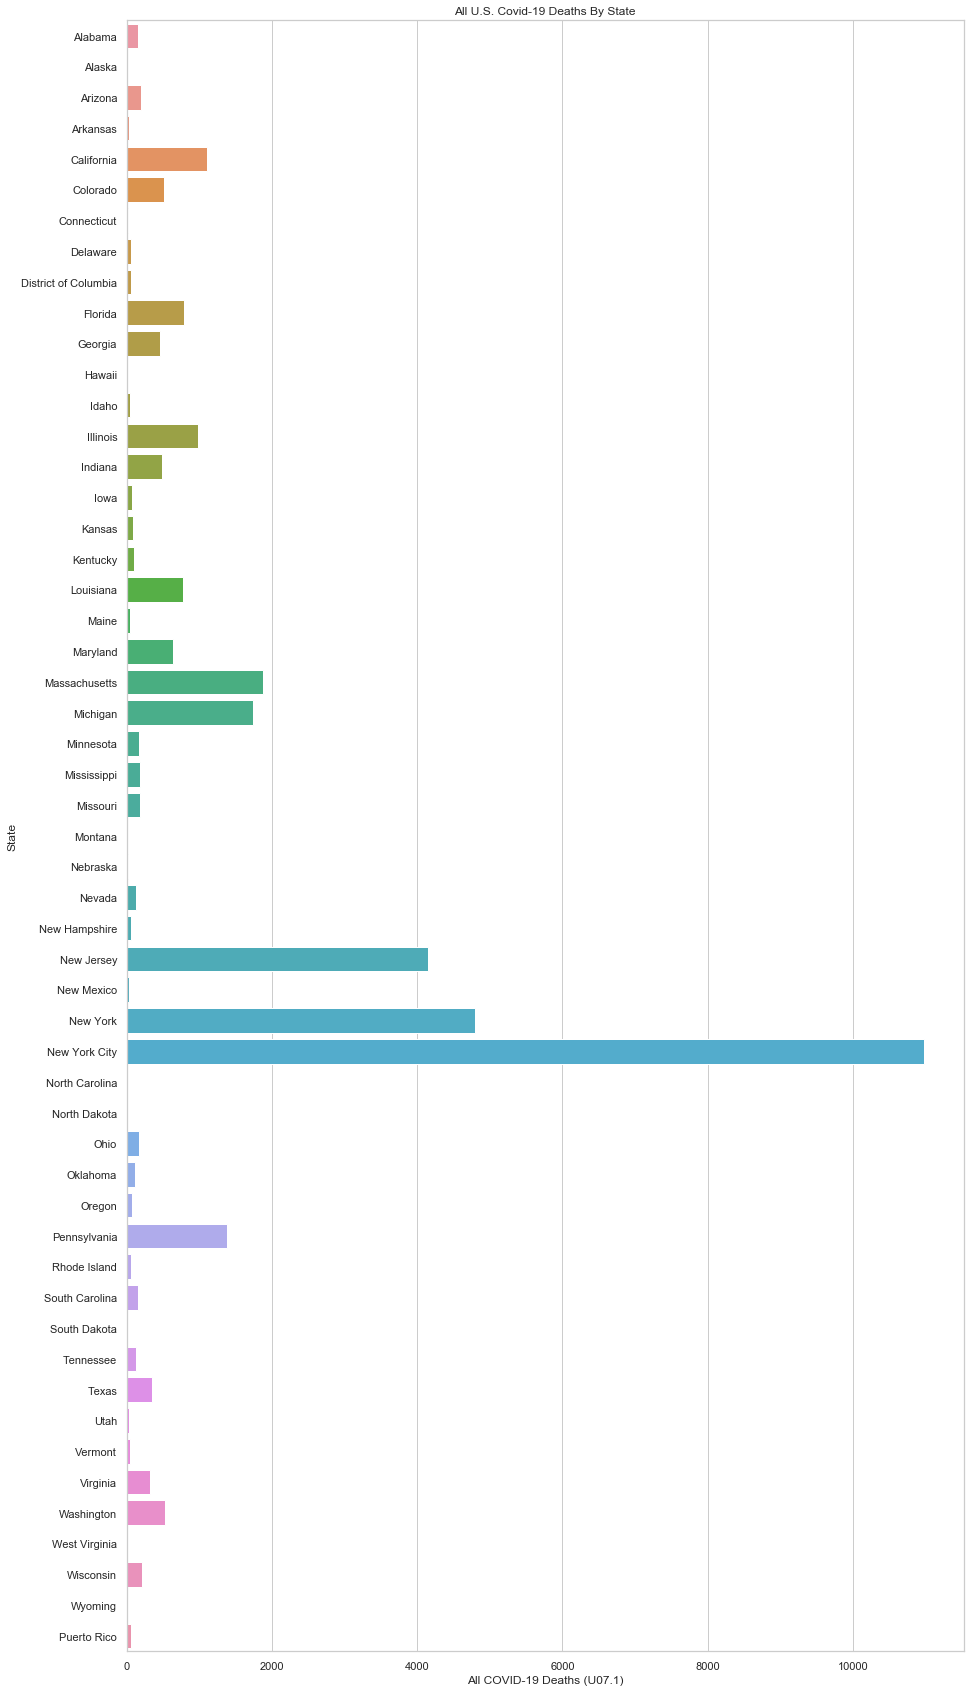

In [25]:
total_covid_deaths_bystate_fillNA.set_index('State', inplace=True)
dropUS= total_covid_deaths_bystate_fillNA.drop(['United States'])

sns.set(style="whitegrid")
plt.figure(figsize=(15,30))
g= sns.barplot(x="All COVID-19 Deaths (U07.1)", y=dropUS.index, data=dropUS)
plt.title('All U.S. Covid-19 Deaths By State')


As we can clearly see, New York has far and away more COVID-19 Deaths than any other state in the U.S. Only surpassed by the city of New York, that has more than double the COVID-19 deaths than the rest of the state of New York.

***
## By Week:

Below We will see when these deaths occurred by Week and compare them to Deaths from all other causes.

Here we will Clean the data from `covid19_deaths` dataframe but this time we will be grouping this data by the `Group` column that contains the value `'By week'`.

We will then clean this data by creating the variable `byweekClean` that will only consist of the `By week` data columns `'End week'`, `'All COVID-19 Deaths (U07.1)'`, `'Deaths from All Causes'`.

We will then further clean the data in the new variable `byweekCleaner` by removing row `0` which consist of the total number of Deaths for all weeks, we just want the deaths per week. Now we will set the index for this data to be the `'End week'` date.

Now we can plot a staked bar chart to show this data visually.



Text(0,0.5,'Number of Deaths')

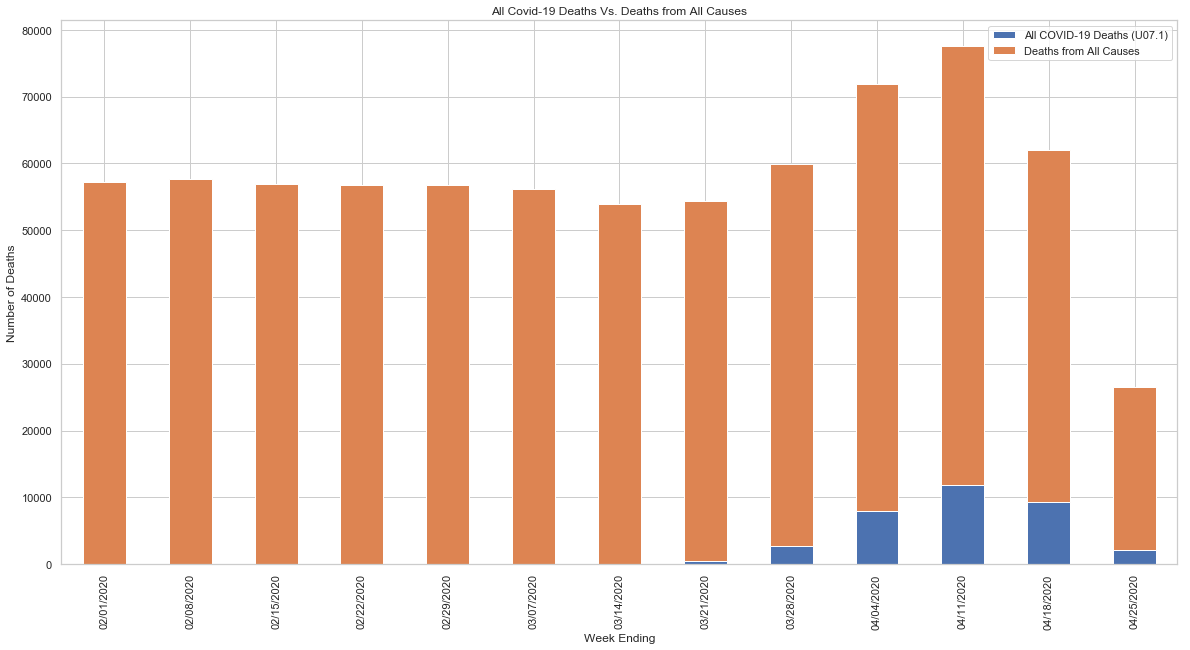

In [26]:
byweek = covid19_deaths[covid19_deaths['Group']=='By week']
byweekClean = byweek[['End week', 'All COVID-19 Deaths (U07.1)', 'Deaths from All Causes']]
byweekCleaner=byweekClean.drop([0])
byweekCleaner.set_index('End week', inplace=True)
byweekCleaner.plot(kind='bar', stacked=True, figsize=(20,10))
plt.title('All Covid-19 Deaths Vs. Deaths from All Causes')
plt.xlabel('Week Ending')
plt.ylabel('Number of Deaths')

As we can see from this chart a significant number of COVID-19 deaths did not begin until the week ending `3/21/20`. And the deadliest week in the US being `4/11/20`.

Another distinction we can see is that COVID-19 is directly responsible for the raised death rate in the US. However, we do see an anomaly of the total death rate in the US dramatically dropping in Week ending `4/25/20`. This could be possibly because at this point, we have been quarantining the entire population so deaths from other aspects, like driving accidents etc., have dropped. Because everyone is at home, less people are outside so deaths that may have occurred, did not. We would need more data to confirm this theory. But it is quite interesting development.

***
## By Age:

Below We will see the death rate `By age` and compare them.

Here we will Clean the data from `covid19_deaths` dataframe but this time we will be grouping this data by the `Group` column that contains the value `'By age'` in the new variable `byage`.

We will then clean this `byage` data by creating the variable `byageClean` that will only consist of the `By age` data columns `'Indicator'`, `'All COVID-19 Deaths (U07.1)'`.

We will then further clean the data in the new variable `byageCleaner` by removing row `14` which consist of the total number of Deaths for all ages, we just want the deaths by each age grouping. Now we will set the index for this data to be the `'Indicator'` column.

Now we can plot a bar chart to show this data visually.

Text(0,0.5,'Number of Deaths')

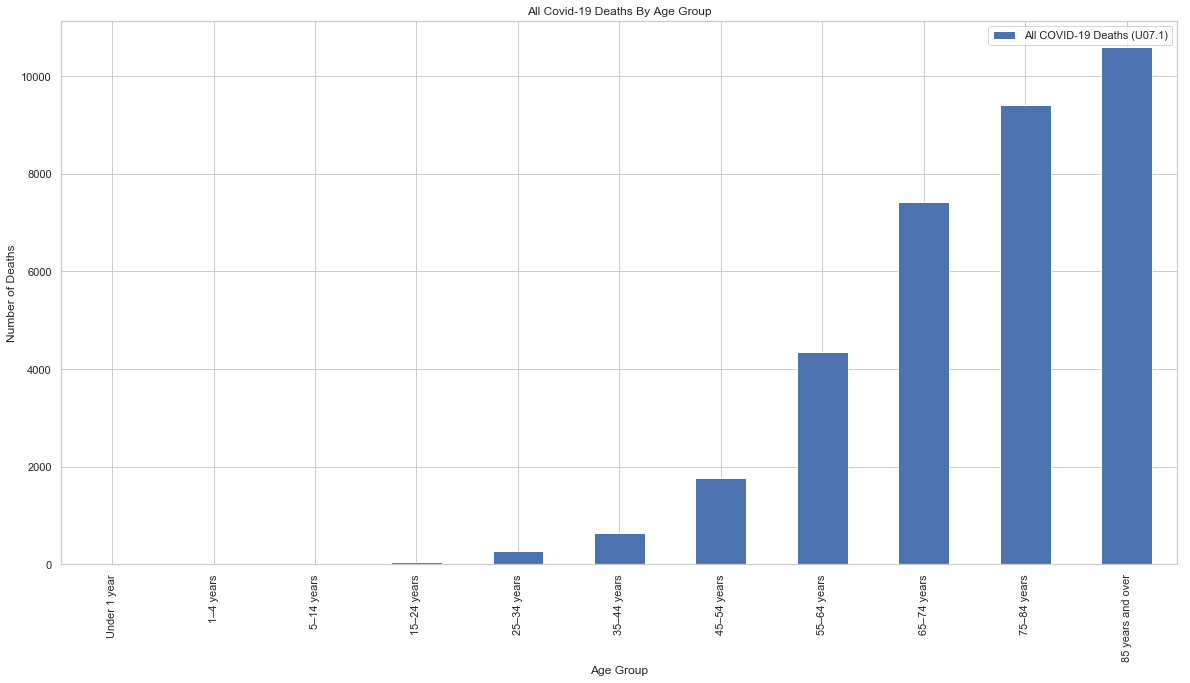

In [27]:
byage= covid19_deaths[covid19_deaths['Group']=='By age']
byageClean= byage[['Indicator', 'All COVID-19 Deaths (U07.1)']]
byageCleaner= byageClean.drop([14])
byageCleaner.set_index('Indicator', inplace=True)
byageCleaner.plot(kind='bar',figsize=(20,10))
plt.title('All Covid-19 Deaths By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Deaths')

As we can see from the chart age directly correlates to the number of COVID-19 deaths as the age groups get older. This proves that those people above the age of 55 have the most serious risk of death should they contract COVID-19. This group should follow more stringent quarantine measures and isolate more. Especially if located in New York State.

***
## By Place of Death:

Below We will see the death rate `By place of death` and compare them.

Here we will Clean the data from `covid19_deaths` dataframe but this time we will be grouping this data by the `Group` column that contains the value `'By place of death'` in the new variable `byplaceofdeath`.

We will then clean this `byplaceofdeath` data by creating the variable `byplaceofdeathClean` that will only consist of the `By place of death` data columns `'Indicator'`, `'All COVID-19 Deaths (U07.1)'`.

We will then further clean the data in the new variable `byplaceofdeathCleaner` by removing row `Total` which consist of the total number of Deaths for all places, we just want the deaths by each location grouping. Now we will set the index for this data to be the `'Indicator'` column.

Now we can plot a bar chart to show this data visually.

Text(0,0.5,'Place of Death')

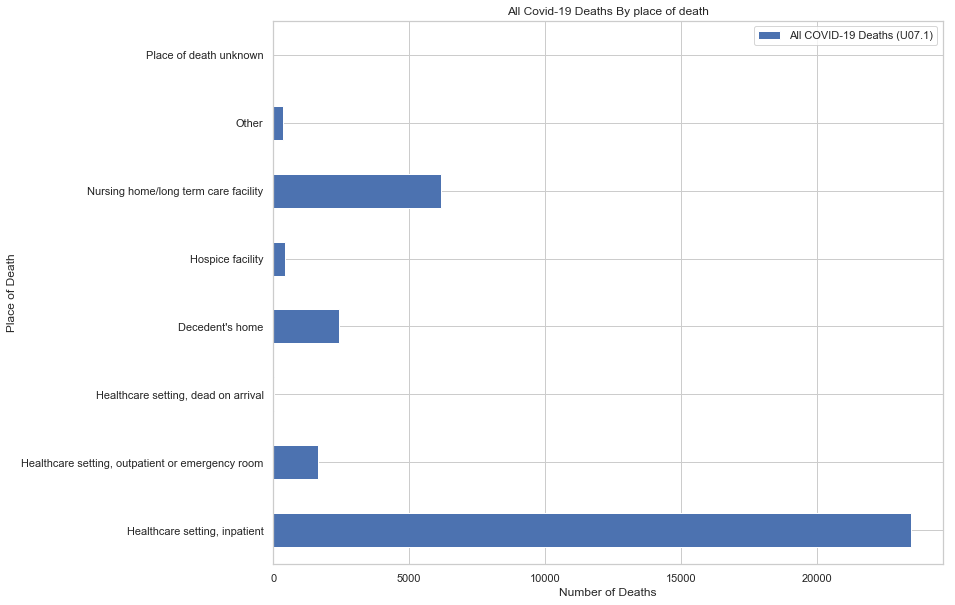

In [28]:
byplaceofdeath = covid19_deaths[covid19_deaths['Group']=='By place of death']
byplaceofdeathClean= byplaceofdeath[['Indicator', 'All COVID-19 Deaths (U07.1)']]
byplaceofdeathClean.set_index('Indicator', inplace=True)
byplaceofdeathCleaner = byplaceofdeathClean.drop(['Total'])
byplaceofdeathCleaner.plot(kind='barh',figsize=(12,10))
plt.title('All Covid-19 Deaths By place of death')
plt.xlabel('Number of Deaths')
plt.ylabel('Place of Death')

What this shows us, is the grim reality, that if you are a patient that is admitted to a hospital due to a severe COVID-19 diagnosis, you are more than 4 to 5 times likely to die in the hospital, than anywhere else.

***
## By Sex:

Below We will see the death rate `By sex` and compare them.

Here we will Clean the data from `covid19_deaths` dataframe but this time we will be grouping this data by the `Group` column that contains the value `'By sex'` in the new variable `bysex`.

We will then clean this `bysex` data by creating the variable `bysexClean` that will only consist of the `By sex` data columns `'Indicator'`, `'All COVID-19 Deaths (U07.1)'`.

We will then further clean the data in the new variable `bysexCleaner` by removing row `Total deaths` which consist of the total number of Deaths for all sexes, we just want the deaths by each sex grouping. Now we will set the index for this data to be the `'Indicator'` column.

Now we can plot a bar chart to show this data visually.

Text(0,0.5,'Sex')

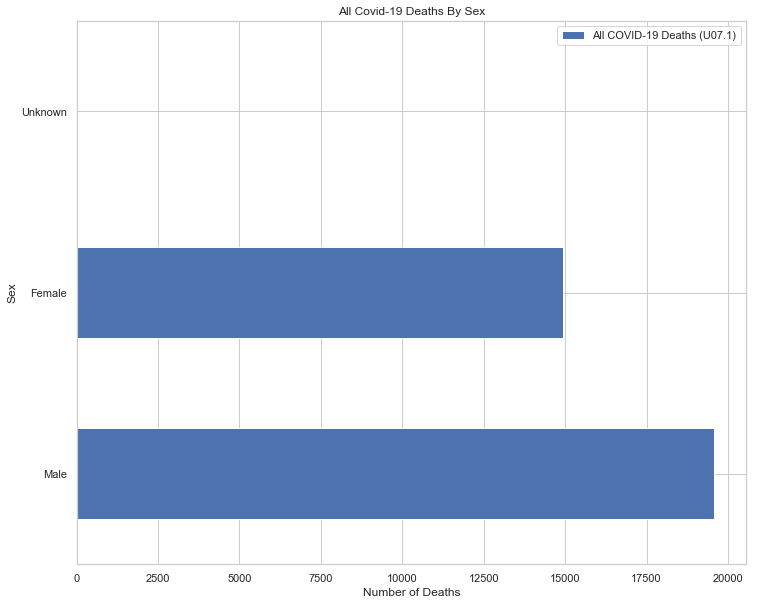

In [29]:
bysex = covid19_deaths[covid19_deaths['Group']=='By sex']
bysexClean = bysex[['Indicator', 'All COVID-19 Deaths (U07.1)']]
bysexClean.set_index('Indicator', inplace=True)
bysexCleaner= bysexClean.drop('Total deaths')
bysexCleaner.plot(kind='barh',figsize=(12,10))
plt.title('All Covid-19 Deaths By Sex')
plt.xlabel('Number of Deaths')
plt.ylabel('Sex')

This surprisingly shows us that men are about 20-25% more likely to die from a COVID-19 related illness then their female counterpart.

***
## New York State Infections by County:
![Cuomo Follow the data](https://www.northcountrypublicradio.org/news/images/4011d98a86_CuomoFlickr050920.jpg)

Since it seems that New York State is the epicenter of the outbreak, i thought it might be a good idea to see exactly where, by County, that the outbreak is occurring in its highest numbers. This data was retrieved from the NY.Gov web site API @ `https://health.data.ny.gov/resource/xdss-u53e.csv`. It references the Number of Covid-19 Test done and confirmed Positive cases according to those tests.

***
First we will create the dataframe `NYStateCovidTest` from the API.

In [30]:
NYStateCovidTest = pd.read_csv('https://health.data.ny.gov/resource/xdss-u53e.csv')
NYStateCovidTest

test_date        county  new_positives  \
0    2020-05-13T00:00:00.000        Albany             15   
1    2020-05-13T00:00:00.000      Allegany              0   
2    2020-05-13T00:00:00.000         Bronx            303   
3    2020-05-13T00:00:00.000        Broome              1   
4    2020-05-13T00:00:00.000   Cattaraugus              3   
5    2020-05-13T00:00:00.000        Cayuga              0   
6    2020-05-13T00:00:00.000    Chautauqua              1   
7    2020-05-13T00:00:00.000       Chemung              0   
8    2020-05-13T00:00:00.000      Chenango              0   
9    2020-05-13T00:00:00.000       Clinton              3   
10   2020-05-13T00:00:00.000      Columbia              9   
11   2020-05-13T00:00:00.000      Cortland              2   
12   2020-05-13T00:00:00.000      Delaware              1   
13   2020-05-13T00:00:00.000      Dutchess             45   
14   2020-05-13T00:00:00.000          Erie             65   
15   2020-05-13T00:00:00.000         Essex              0   
16   2020-05-13T00:00:00.000      Franklin              0   
17   2020-05-13T00:00:00.000        Fulton              4   
18   2020-05-13T00:00:00.000       Genesee              1   
19   2020-05-13T00:00:00.000        Greene              1   
20   2020-05-13T00:00:00.000      Hamilton              0   
21   2020-05-13T00:00:00.000      Herkimer              2   
22   2020-05-13T00:00:00.000     Jefferson              1   
23   2020-05-13T00:00:00.000         Kings            428   
24   2020-05-13T00:00:00.000         Lewis              1   
25   2020-05-13T00:00:00.000    Livingston              3   
26   2020-05-13T00:00:00.000       Madison              2   
27   2020-05-13T00:00:00.000        Monroe             60   
28   2020-05-13T00:00:00.000    Montgomery              1   
29   2020-05-13T00:00:00.000        Nassau            156   
..                       ...           ...            ...   
970  2020-04-28T00:00:00.000        Queens            812   
971  2020-04-28T00:00:00.000    Rensselaer             12   
972  2020-04-28T00:00:00.000      Richmond            144   
973  2020-04-28T00:00:00.000      Rockland            133   
974  2020-04-28T00:00:00.000      Saratoga              3   
975  2020-04-28T00:00:00.000   Schenectady             10   
976  2020-04-28T00:00:00.000     Schoharie              1   
977  2020-04-28T00:00:00.000      Schuyler              0   
978  2020-04-28T00:00:00.000        Seneca              0   
979  2020-04-28T00:00:00.000       Steuben              4   
980  2020-04-28T00:00:00.000  St. Lawrence              0   
981  2020-04-28T00:00:00.000       Suffolk            541   
982  2020-04-28T00:00:00.000      Sullivan             42   
983  2020-04-28T00:00:00.000         Tioga              2   
984  2020-04-28T00:00:00.000      Tompkins              1   
985  2020-04-28T00:00:00.000        Ulster             22   
986  2020-04-28T00:00:00.000        Warren              2   
987  2020-04-28T00:00:00.000    Washington              3   
988  2020-04-28T00:00:00.000         Wayne              0   
989  2020-04-28T00:00:00.000   Westchester            381   
990  2020-04-28T00:00:00.000       Wyoming              2   
991  2020-04-28T00:00:00.000         Yates              0   
992  2020-04-27T00:00:00.000        Albany             30   
993  2020-04-27T00:00:00.000      Allegany              0   
994  2020-04-27T00:00:00.000         Bronx            438   
995  2020-04-27T00:00:00.000        Broome              5   
996  2020-04-27T00:00:00.000   Cattaraugus              0   
997  2020-04-27T00:00:00.000        Cayuga              0   
998  2020-04-27T00:00:00.000    Chautauqua              0   
999  2020-04-27T00:00:00.000       Chemung              5   

     cumulative_number_of_positives  total_number_of_tests  \
0                              1509                    546   
1                                44                     53   
2                             41980               

Since this data consist of each county in NYS, and those cases as of a particular date in the `test_date` column, we will need to retrieve only the data that has accumulated as of `4/30/20`. Seeing as this data goes far beyond that date to `5/12/20`, we will need to modify the `test_date` column to a `datetime` object so we can search for what we need easier.

***
Lets change `test_date` to a datetime object.

In [31]:
NYStateCovidTest['test_date']= pd.to_datetime(NYStateCovidTest['test_date']).dt.strftime("%m/%d/%y")

***
Now we will select our needed columns.

In [32]:
NYStateCovidTestClean= NYStateCovidTest[['test_date','county','cumulative_number_of_positives']]



***
Lets set the `test_date` column to our index.

In [33]:
NYStateCovidTestClean.set_index('test_date', inplace=True)



***
Now we can select a prticular `test_date` to match our other dataset, that only goes to `4/30/20`

In [34]:
NYStateCovidTestClean_4_30_20 = NYStateCovidTestClean.loc['04/30/20']



***
Now that we have only the totals from each county as of 4/30/20, we can rid ourselves of the `test_date` index and use the counties as our new index, in our variable `graf` that will be used to graf our chart of infections by County.

Text(0,0.5,'County')

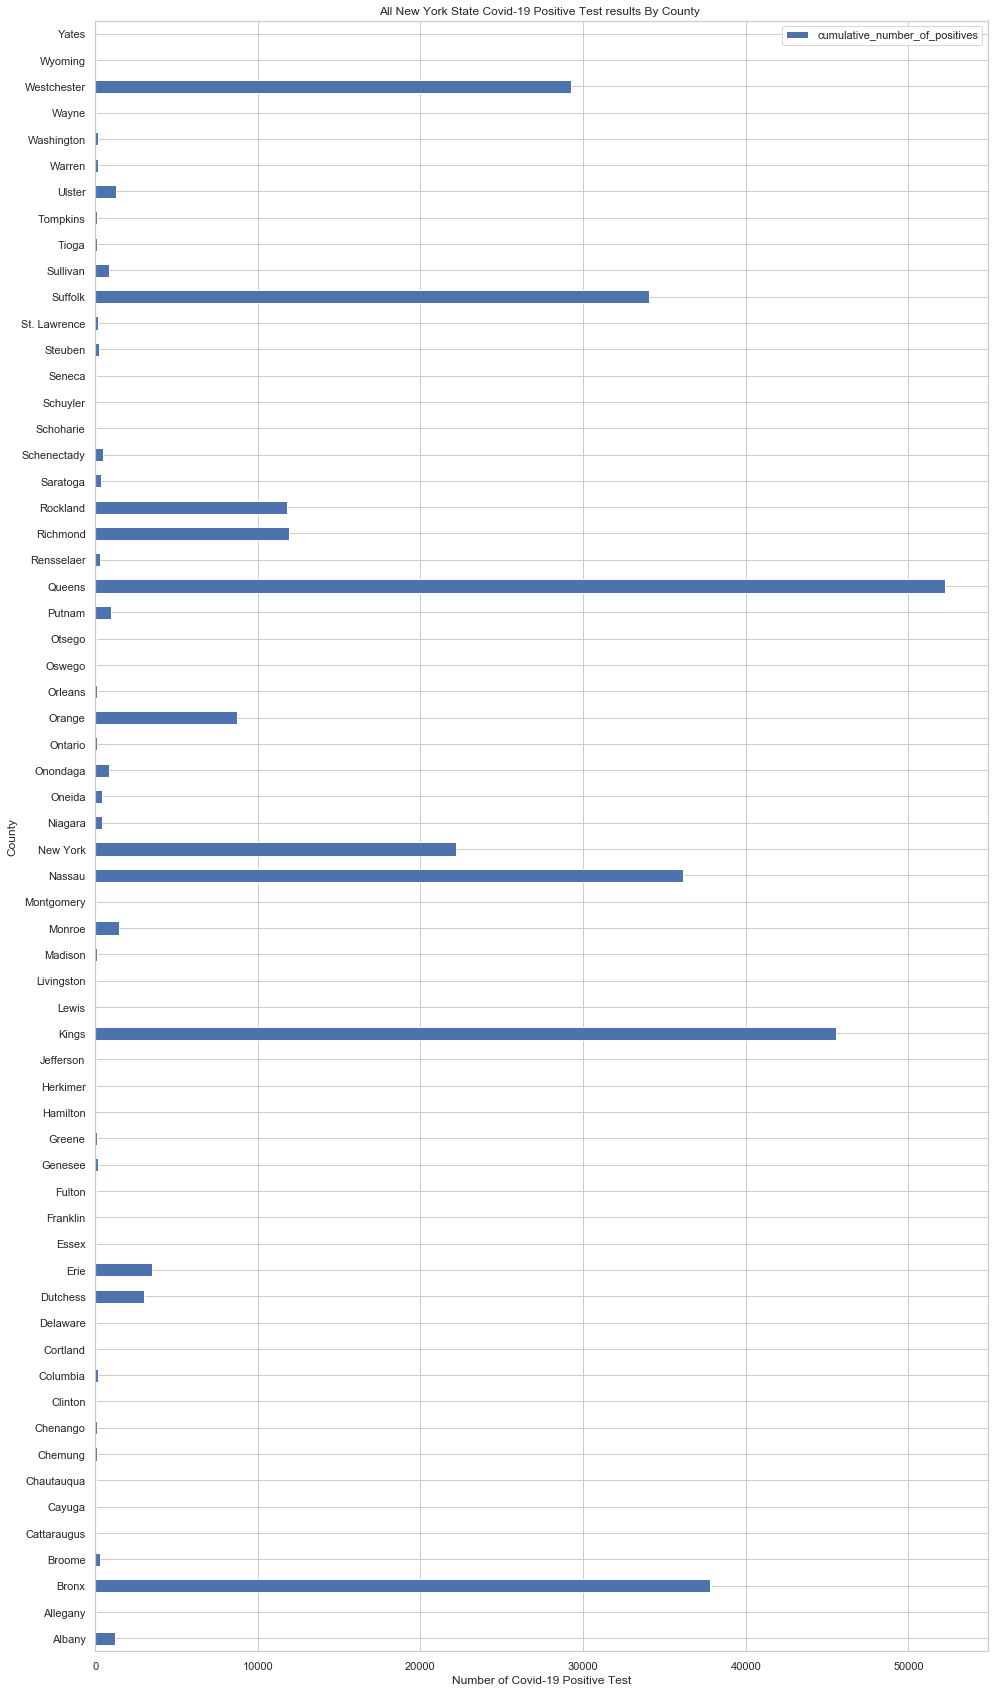

In [35]:
graf = NYStateCovidTestClean_4_30_20.set_index('county')
graf.plot(kind='barh', figsize=(16, 30))
plt.title('All New York State Covid-19 Positive Test results By County ')
plt.xlabel('Number of Covid-19 Positive Test')
plt.ylabel('County')

This chart shows us that NYC (consisting of Queens, New York, Bronx and Kings Counties), Long Island (consisting of Nassau and Suffolk Counties), and Westchester County are the most sever hit counties in New York state with confirmed COVID-19 test results. With all of these counties the closest proximity to Manhattan where many of the people who live in this area commute to work, it is sad to say the relative distance that you work, or live, in relation to the Borough of Manhattan, the greater at risk you are to catching COVID-19, With Queens having the highest infection rate.

***
## Conclusion:
As for what my project conclusion can definitively say is, if you are In the United States, in New York state, more specifically New York City, in the county of Queens, and are a  Male over the Age of 55, and are admitted to a hospital as an inpatient with a COVID-19 infection, the mortality rate is quite Hight.

More generally, those Who are Older 60+ years old are highly susceptible to death from COVID-19, Males more so than Females. Additionally, Regions that surround the Island of Manhattan, that most people commute to for work daily, have been the most greatly affected, and remains the Countries epicenter of the infection within the US that has an exponential amount more infections than anywhere in the US.

So, while the correlations I am able to decipher from this data is not groundbreaking in any way, especially if your watching the news on an endless loop, you are already aware of these facts. However, the reason we are able to be aware of the effects of COVID-19, where the outbreak is occurring, and who is the most susceptible to death from it, are because of data scientist hard at work gathering all this data, cleaning it, and presenting it for State and local government officials to reach conclusions on just where, how, and who, the virus is attacking in real time, and to implement rapidly a defensive strategies in slowing the spread of the Coronavirus.